I downloaded the data on the Google Colab Notebook Notebook itself.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
train = pd.read_csv('/content/Dataset/Train.csv')

In [ ]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [ ]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [ ]:
categorical_columns = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']

In [ ]:
def categorise(column, data):

  # CREATING DICTIONARY
  category_dict = {}
  for index in range(data[column].nunique()):
    category_dict[sorted(data[column].unique())[index]] = index
  
  # DEFINE CATEGORISING FUNCTION
  def game(key):
    return category_dict[key]

  # APPLYING FUNTION TO THE FEATURE
  data[column] = data[column].apply(game)

In [ ]:
for col in categorical_columns:
  categorise(col, train)

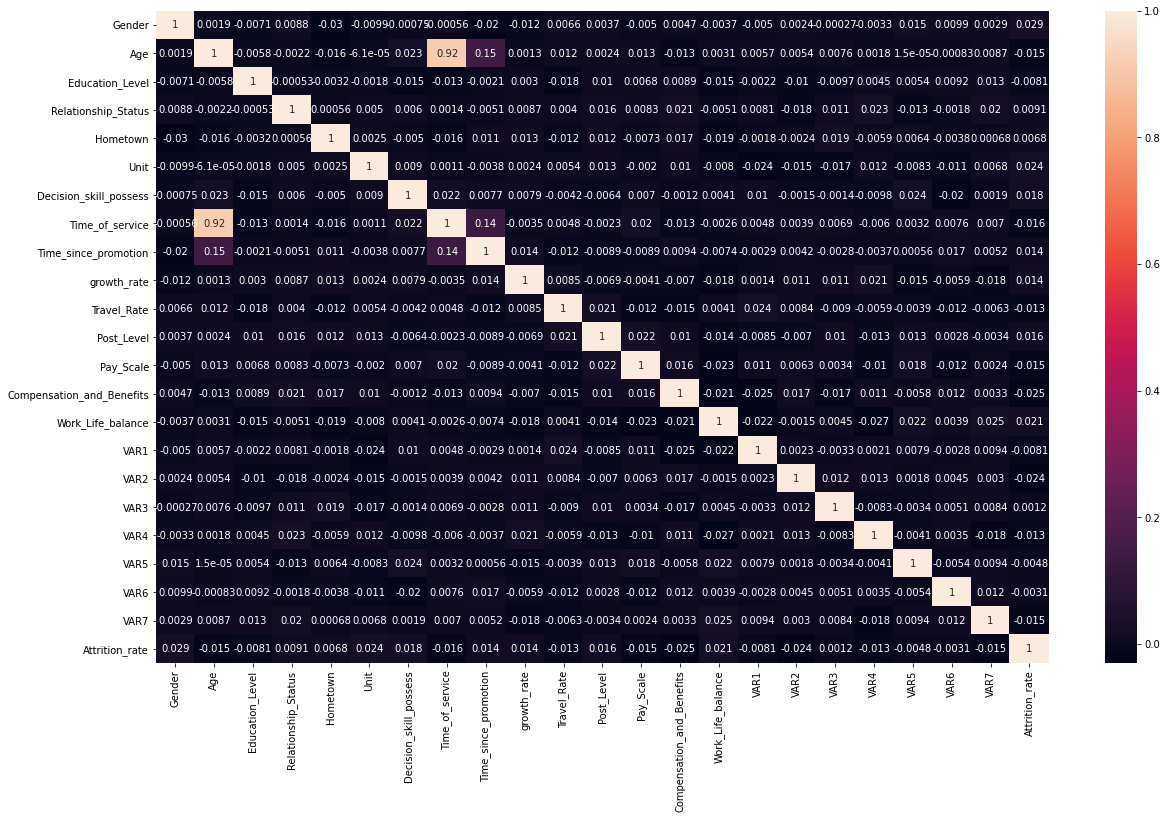

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), annot=True)

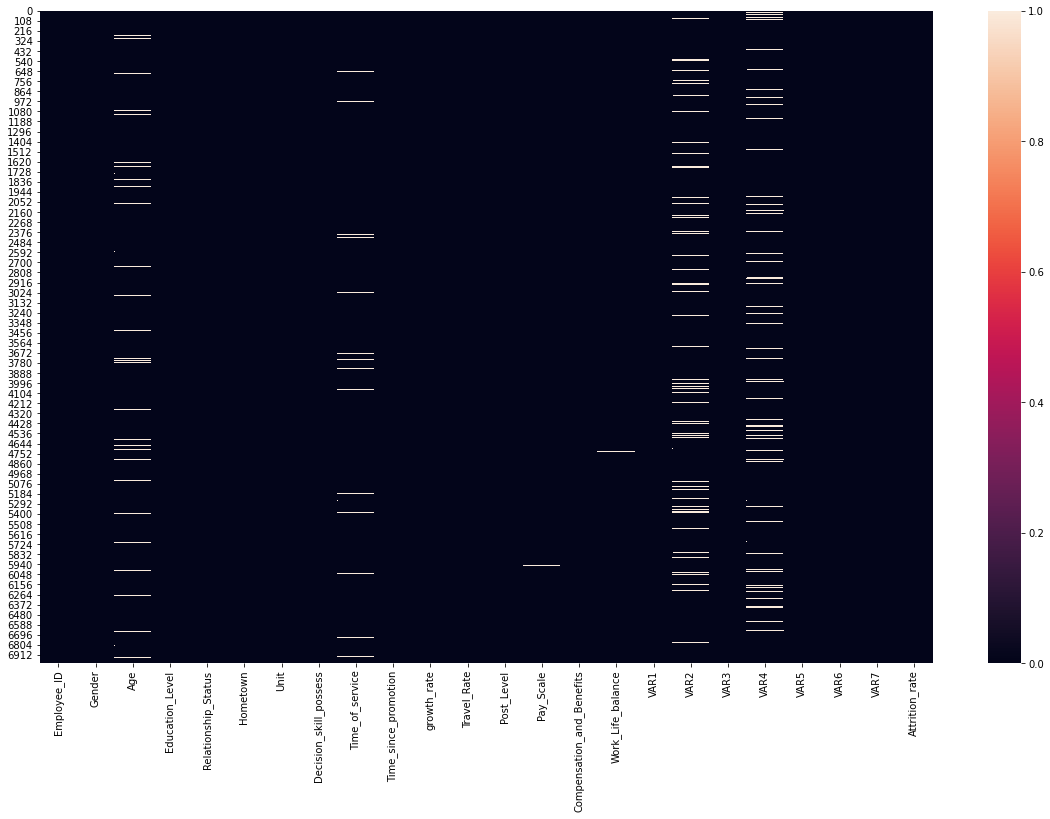

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(train.isna())

VARs filled with the value with the highest value counts.

In [ ]:
# train.VAR4.value_counts()
train.VAR4.fillna(2, inplace=True)

In [ ]:
train.VAR2.unique()

array([ 0.7516, -0.9612, -1.8176, -0.1048,     nan,  1.6081])

In [ ]:
train.VAR2.fillna(0.7516, inplace=True)

In [ ]:
train.Time_of_service.unique()

array([ 4.,  5., 27., 19.,  2., 34., 13., 21., 31.,  0., 35., 12.,  9.,
        7.,  3.,  6., 33., 15., nan, 28., 30., 10., 26., 14., 18., 24.,
       23., 20., 22.,  8., 32., 11.,  1., 29., 16., 25., 36., 17., 38.,
       37., 41., 42., 39., 40., 43.])

In [ ]:
# train[train.Age.notna()][train.Time_of_service.notna()][['Age', 'Time_of_service']]
for index in range(len(train)):
  if train.Time_of_service[index] not in range(50):
    if train.Age[index] >= 40:
      train.Time_of_service[index] = 20
    elif train.Time_of_service[index] >= 26 and train.Time_of_service[index] < 40:
      train.Time_of_service[index] = 5
    else:
      train.Time_of_service[index] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
train.Pay_Scale.fillna(8, inplace=True)

In [ ]:
test = pd.read_csv('/content/Dataset/Test.csv')

In [ ]:
for col in categorical_columns:
  categorise(col, test)

In [ ]:
test.VAR4.fillna(2, inplace=True)

In [ ]:
test.VAR2.fillna(0.7516, inplace=True)

In [ ]:
for index in range(len(test)):
  if test.Time_of_service[index] not in range(50):
    if test.Age[index] >= 40:
      test.Time_of_service[index] = 20
    elif test.Time_of_service[index] >= 26 and test.Time_of_service[index] < 40:
      test.Time_of_service[index] = 5
    else:
      test.Time_of_service[index] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   int64  
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   int64  
 5   Hometown                   3000 non-null   int64  
 6   Unit                       3000 non-null   int64  
 7   Decision_skill_possess     3000 non-null   int64  
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [ ]:
test.Pay_Scale.fillna(8, inplace=True)

In [ ]:
test.Work_Life_balance.fillna(1, inplace=True)

SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, HuberRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [ ]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [ ]:
X = train.drop(['Employee_ID', 'Attrition_rate', 'Travel_Rate', 'Hometown', 'Relationship_Status', 'Gender', 'Work_Life_balance', 'Compensation_and_Benefits', 'Education_Level', 'Unit', 'Post_Level', 'VAR1', 'VAR5', 'VAR6', 'Age'], axis=1)
y = train.Attrition_rate

In [ ]:
X.columns

Index(['Decision_skill_possess', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Pay_Scale', 'VAR2', 'VAR4', 'VAR7'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Decision_skill_possess  7000 non-null   int64  
 1   Time_of_service         7000 non-null   float64
 2   Time_since_promotion    7000 non-null   int64  
 3   growth_rate             7000 non-null   int64  
 4   VAR2                    7000 non-null   float64
 5   VAR3                    7000 non-null   float64
 6   VAR4                    7000 non-null   float64
 7   VAR7                    7000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 437.6 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
def rmse(y_true, y_pred):
  return 100 * (1 - (mean_squared_error(y_true, y_pred) ** 0.5))

## Ridge

In [ ]:
model_ridge = Ridge(tol=0.1, )

In [ ]:
kf_ridge = KFold(3)
accuracy = []
i=1
kf_ridge.get_n_splits(X,y)
for train_index, test_index in kf_ridge.split(X,y):
  # print('Train: ', train_index, 'Validation: ', test_index)
  X5_train, X5_test = X.iloc[train_index], X.iloc[test_index]
  y5_train, y5_test = y.iloc[train_index], y.iloc[test_index]
  
  model_ridge.fit(X5_train, y5_train)
  labels = model_ridge.predict(X5_test)
  rmse_score = rmse(y5_test, labels)
  accuracy.append(rmse_score)
  
  if i==1:
    break
  else:
    i+=1
print(accuracy)

[82.27581149437583]


In [ ]:
predictions_ridge = model_ridge.predict(test[X.columns])

In [ ]:
submission_ridge = pd.DataFrame(data=predictions_ridge, index=test.Employee_ID, columns=['Attrition_rate'])

In [ ]:
submission_ridge.to_csv('submission_ridge.csv')

## Linear Regression

In [ ]:
model_lr = LinearRegression()

In [ ]:
kf_lr = KFold(3)

In [ ]:
accuracy = []
i=1
kf_lr.get_n_splits(X,y)
for train_index, test_index in kf_lr.split(X,y):
  # print('Train: ', train_index, 'Validation: ', test_index)
  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
  
  model_lr.fit(X1_train, y1_train)
  labels = model_lr.predict(X1_test)
  rmse_score = rmse(y1_test, labels)
  accuracy.append(rmse_score)
  
  if i==1:
    break
  else:
    i+=1
print(accuracy)

[82.27580286881498]


In [ ]:
predictions_lr = model_lr.predict(test[X.columns])

In [ ]:
submission_lr = pd.DataFrame(data=predictions_lr, index=test.Employee_ID, columns=['Attrition_rate'])
submission_lr.to_csv('submission_lr.csv')